In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("data.csv")

In [4]:
data.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15
0,0,221900,3,1,1180,1,0,0,7,1180,0,0,1340
1,1,538000,3,2,2570,2,0,0,7,2170,400,1991,1690
2,2,180000,2,1,770,1,0,0,6,770,0,0,2720
3,3,604000,4,3,1960,1,0,0,7,1050,910,0,1360
4,4,510000,3,2,1680,1,0,0,8,1680,0,0,1800


# Standardring Data 

In [9]:
X=data.drop("price",axis=1)

In [11]:
X.head()

,Unnamed: 0,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15
0,0,3,1,1180,1,0,0,7,1180,0,0,1340
1,1,3,2,2570,2,0,0,7,2170,400,1991,1690
2,2,2,1,770,1,0,0,6,770,0,0,2720
3,3,4,3,1960,1,0,0,7,1050,910,0,1360
4,4,3,2,1680,1,0,0,8,1680,0,0,1800


In [12]:
y=data["price"]

In [14]:
y.head(2)

0    221900
1    538000
Name: price, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
tf=train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=True)

In [19]:
x_train.shape

(15129, 12)

In [20]:
x_test.shape

(6484, 12)

In [21]:
y_train.shape

(15129,)

In [22]:
from  sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [23]:
x_train=st.fit_transform(x_train)

In [24]:
x_test=st.fit_transform(x_test)

In [26]:
x_train

array([[-1.40568083, -0.39355042,  0.34047071, ..., -0.66420519,
        -0.20964845,  0.12644749],
       [ 0.14894762, -1.46134529, -1.03312433, ..., -0.66420519,
        -0.20964845, -1.31609118],
       [-0.40965431, -0.39355042, -1.03312433, ..., -0.66420519,
        -0.20964845, -1.24249227],
       ...,
       [-0.90366038, -0.39355042, -1.03312433, ...,  0.24415794,
        -0.20964845,  0.70051901],
       [ 0.21514636, -0.39355042,  0.34047071, ...,  0.90272121,
        -0.20964845, -0.63898119],
       [-1.69820551,  1.74203934,  3.08766079, ..., -0.66420519,
        -0.20964845,  2.1283379 ]])

In [27]:
from sklearn.svm import SVR

In [28]:
svr=SVR()

In [29]:
svr.fit(x_train,y_train)

SVR()

In [33]:
y_pred=svr.predict(x_test)

In [34]:
 from sklearn.metrics import mean_absolute_error

In [35]:
print("mean_aboslute_error",mean_absolute_error(y_test,y_pred))

mean_aboslute_error 227415.2834394968


In [36]:
from sklearn import metrics

In [37]:
print("r2 score",metrics.r2_score(y_test,y_pred))

r2 score -0.05547246237229886


<AxesSubplot:xlabel='price'>

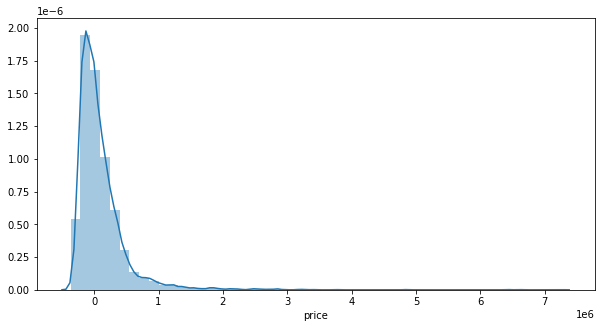

In [38]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [39]:
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

VarScore: 0.0022791369386711002


# With the observation SVR got very very low performance

#  with using SVR very worst model to train this database